# Prediction of Diabetes 

## Initial dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
import numpy as np

In [6]:
diab=pd.read_csv('F:\diabetes1.csv',sep=',')

In [7]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014084F03160>,
      dtype=object)

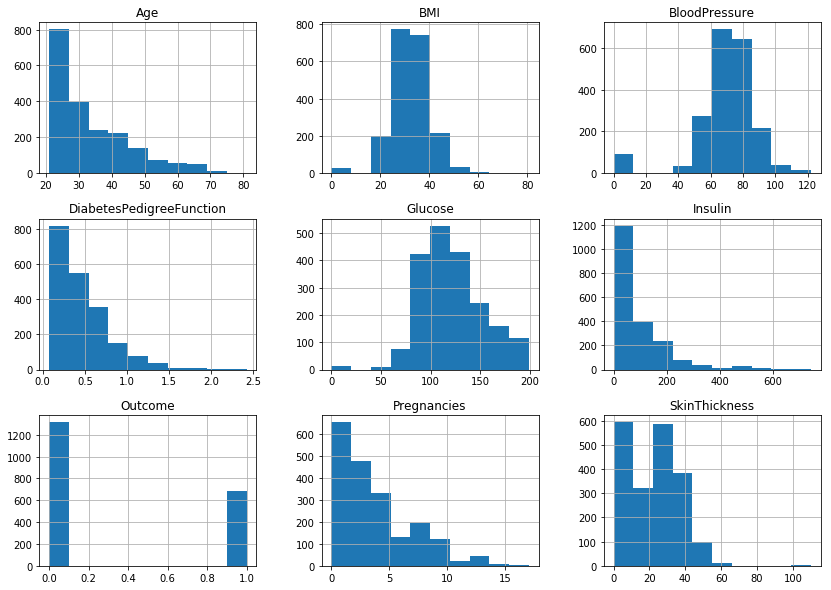

In [8]:
diab.hist(figsize = (14,10))

In [9]:
theta=[0,0,0,0,0,0,0,0]

In [10]:
diabtemp=diab

In [11]:
diabtemp['SkinThickness'].replace(0,np.NaN,inplace=True)

In [12]:
diabtemp['BloodPressure'].replace(0,np.NaN,inplace=True)

In [13]:
diabtemp['SkinThickness'].replace(np.NaN,diabtemp['SkinThickness'].mean(),inplace=True)
diabtemp['BloodPressure'].replace(np.NaN,diabtemp['BloodPressure'].mean(),inplace=True)

In [14]:
diabtemp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62.000000,35.000000,0,33.6,0.127,47,1
1,0,84,82.000000,31.000000,125,38.2,0.233,23,0
2,0,145,72.403665,29.341275,0,44.2,0.630,31,1
3,0,135,68.000000,42.000000,250,42.3,0.365,24,1
4,1,139,62.000000,41.000000,480,40.7,0.536,21,0


In [15]:
diab=diabtemp

In [16]:
from sklearn.model_selection import train_test_split
diabtrainx,diabtestx,diabtrainy,diabtesty = train_test_split(diab.iloc[:,:-1],diab.iloc[:,-1],random_state=0)

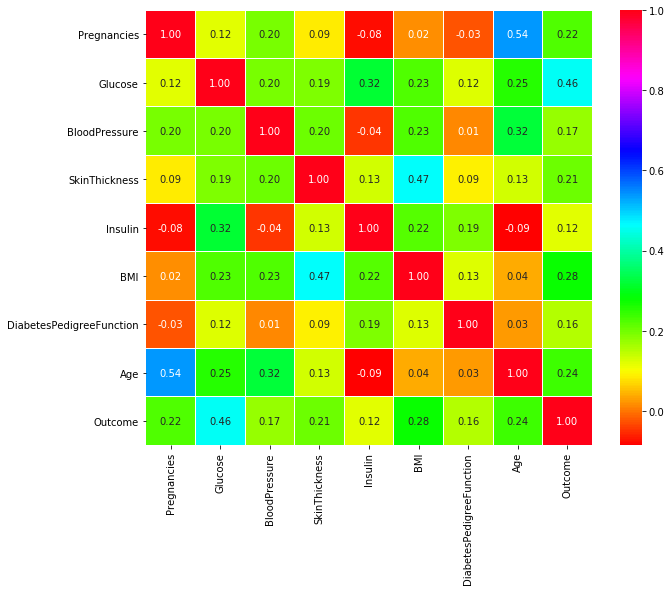

In [61]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(diab.corr(), ax =ax, annot = True, linewidths=0.05,fmt='.2f',cmap="hsv")

## Sigmoid function
    

In [17]:
dbtrx=diabtrainx.values
dbtry=diabtrainy.values
dbtex=diabtestx.values
dbtey=diabtesty.values

In [18]:
dbtry

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
def sigmoid(z):
    #(r,c)=z.shape
    g=np.zeros((len(z),))
    for i in range(len(z)):
        g[i]=1/(1+np.exp(-z[i]))
    return g

### example
z=np.array([[3,1],
[4,9]])

sigmoid(z)

[[0.95257413, 0.73105858],
 [0.98201379, 0.99987661]]

## predict function

In [20]:
def predict(z,t):
    pred=np.zeros((len(z)))
    for i in range(len(z)):
        if(z[i]>=t):
            pred[i]=1
        else:
            pred[i]=0
    return pred

# Training a Logistic model 

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
m=0
mini=0
costz=np.zeros(10)
for alpha in np.linspace(0.0001,0.001,10):
    thetaz=theta
    for i in range(250):
        thetaz=thetaz-(alpha/len(dbtrx))*np.dot(np.transpose(dbtrx),(sigmoid(np.dot(dbtrx,thetaz))-dbtry))
    print(thetaz)
    
    cost=(-1/len(dbtry))*(np.dot(np.transpose(dbtry),np.log(sigmoid(np.dot(dbtrx,thetaz))))+np.dot(np.transpose(np.ones(len(dbtry))-dbtry),np.log(np.ones(len(dbtry))-sigmoid(np.dot(dbtrx,thetaz)))))
    print(cost)
    print(alpha)
    print('-----------------------------')
    costz[m]=cost
    if(mini==0):
        mini=cost
        mintheta=thetaz
        al=alpha
    if(mini>cost):
        mini=cost
        mintheta=thetaz
        al=alpha
    m=m+1
print("\n")
print("best alpha and it's least cost and theta choosen:")
print(al)
print(mini)
print(mintheta)

[ 5.65641426e-03  1.53812816e-02 -3.19376311e-02 -5.66850095e-03
  1.46548879e-04 -3.16329027e-03  9.89839851e-05  4.31230922e-03]
0.6029855009404711
0.0001
-----------------------------
[ 1.11450865e-02  1.85313082e-02 -4.16999656e-02 -5.43125473e-03
 -1.78149055e-05 -5.62105951e-04  2.59121940e-04  1.03047113e-02]
0.5955436502581846
0.00019999999999999998
-----------------------------
[ 0.01656484  0.02586566 -0.05092612 -0.00530471  0.00272671  0.0023045
  0.0004621   0.01629858]
0.6738870888540583
0.0003
-----------------------------
[ 0.02231679  0.03954511 -0.06924085 -0.00728412  0.00423623  0.00392541
  0.00066489  0.02315834]
0.8673563575344555
0.00039999999999999996
-----------------------------
[ 0.02792394  0.05237936 -0.08801812 -0.00926012  0.00431465  0.00562598
  0.00085125  0.02948015]
1.0282990800063738
0.0005
-----------------------------
[ 0.03348123  0.06419056 -0.10598238 -0.01100708  0.00388295  0.00740207
  0.00102145  0.03555529]
1.16614430323335
0.000600000000

## Evaluating model

In [23]:
maxa=0
for i in np.linspace(0.1,1,1000):
    predte=predict(sigmoid(np.dot(dbtex,mintheta)),i)
    acc=accuracy_score(dbtey,predte)
    if(maxa==0):
        maxa=acc
    if(maxa<acc):
        maxa=acc   
        x=i
print(x)
print(maxa)

0.5351351351351351
0.702


In [24]:
predte=predict(sigmoid(np.dot(dbtex,mintheta)),x)
predtr=predict(sigmoid(np.dot(dbtrx,mintheta)),x)

### confusion matrix
             
               predicted
               
               -ve      +ve
    Actual -ve  TN       FP   
           +ve  FN       TP ---------> RECALL
                         |
                         |
                         v
                       PRECISION

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dbtey,predte)

array([[304,  30],
       [119,  47]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(dbtey,predte)))
print('Precision: {:.2f}'.format(precision_score(dbtey,predte)))
print('Recall: {:.2f}'.format(recall_score(dbtey,predte)))
print('F1: {:.2f}'.format(f1_score(dbtey,predte)))

Accuracy: 0.70
Precision: 0.61
Recall: 0.28
F1: 0.39


In [50]:
accuracy_score(dbtry,predtr)

0.7026666666666667

In [49]:
accuracy_score(dbtey,predte)

0.702

## Simple Visualization for the outputs


Text(0.5, 1.0, 'Testeg')

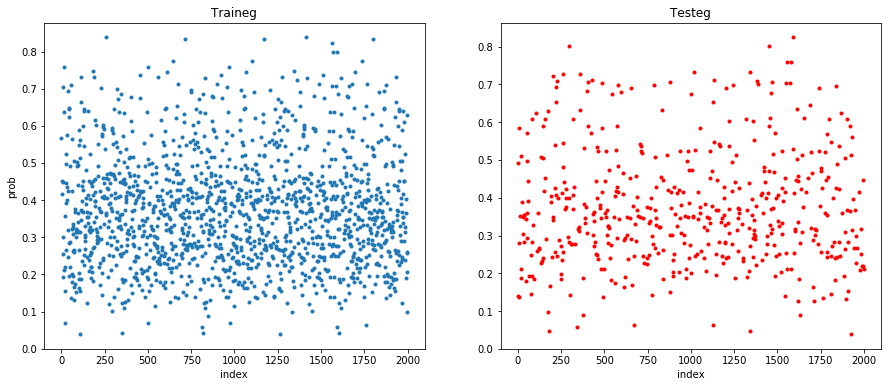

In [29]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(diabtrainy.index.values,sigmoid(np.dot(dbtrx,mintheta)),'.')
plt.xlabel("index")
plt.ylabel("prob")
plt.title("Traineg")
plt.subplot(1,2,2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=6
fig_size[1]=6
plt.rcParams["figure.figsize"] = fig_size
plt.plot(diabtesty.index.values,sigmoid(np.dot(dbtex,mintheta)),'.r')
plt.xlabel("index")
plt.title("Testeg")

Text(0.5, 1.0, 'predicted')

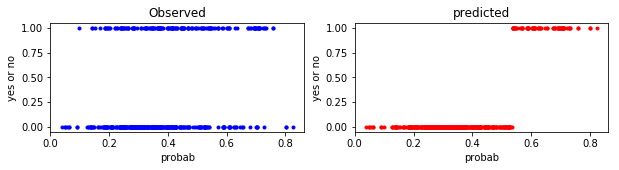

In [30]:
plt.figure(figsize=(10, 2))

plt.subplot(1, 2, 1)
plt.plot(sigmoid(np.dot(dbtex,mintheta)),dbtey,'.b')
plt.ylabel("yes or no")
plt.xlabel("probab")
plt.title("Observed")

plt.subplot(1,2,2)
plt.plot(sigmoid(np.dot(dbtex,mintheta)),predte,'.r')
plt.ylabel("yes or no")
plt.xlabel("probab")
plt.title("predicted")

Text(0.5, 1.0, 'Train')

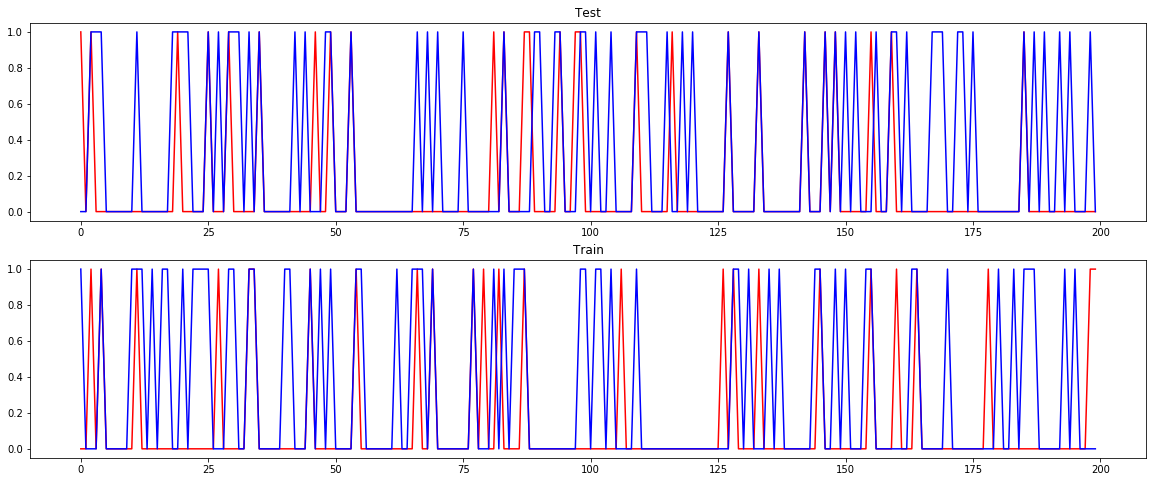

In [46]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.plot(predte[:200],'-r',dbtey[:200],'-b')
plt.title("Test")
plt.subplot(2,1,2)
plt.plot(predtr[:200],'-r',dbtry[:200],'-b')
plt.title("Train")


## Other algorithms using Scikit packages
- Random Forest Classifier
- Support Vector Machines
- Logistic regression


### 1.Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [107]:
X_train,X_test,y_train,y_test = train_test_split(diab.iloc[:,:-1],diab.iloc[:,-1],random_state=0)

In [108]:
Rfc = RandomForestClassifier(n_estimators = 25,random_state=5).fit(X_train, y_train)
print("Accuracy for Random Forest Classifier:")
print(Rfc.score(X_test,y_test))

Accuracy for Random Forest Classifier:
0.982


In [126]:
y_predt=Rfc.predict(X_test)
confusion_matrix(y_test,y_predt)

array([[332,   2],
       [  7, 159]], dtype=int64)

In [ ]:
X=Rfc.predict([[1,139,62,41,480,40.6,0.536,21]])
if(X==0):
    print('Not Diabetic')
else:
    print('Diabetic')

### 2.SVM

In [116]:
clf = SVC(kernel = 'linear').fit(X_train, y_train)

In [122]:
print("Accuracy for SVM:")
print(clf.score(X_test,y_test))

Accuracy for SVM:
0.772


In [127]:
y_predt=clf.predict(X_test)
confusion_matrix(y_test,y_predt)

array([[295,  39],
       [ 75,  91]], dtype=int64)

### 3.Logistic Regression

In [124]:
lr= LogisticRegression().fit(X_train,y_train)
print("Accuarcy for LR:")
print(lr.score(X_test,y_test))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuarcy for LR:
0.772


In [128]:
y_predt=lr.predict(X_test)
confusion_matrix(y_test,y_predt)

array([[297,  37],
       [ 77,  89]], dtype=int64)